In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('/content/81-90.csv')

###Linear Regression

In [60]:
X = df[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]
y = df['cit_2022']
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:

model = LinearRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions for 2022 citations
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
# Extract the coefficients and intercept of the fitted line
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Coefficients: [-126.03346366  173.77886646  -94.75857196 -182.96963503  507.21998893]
Intercept: 301.0765503273337
Mean Squared Error: 6692.611870093283
Mean Absolute Error: 59.44567028067778


In [62]:
predicted_data = pd.DataFrame({'Actual': y_test, 'Predicted_cit_2022': y_pred})
# Save the DataFrame to a CSV file
predicted_data.to_csv('predicted_cit_2022_Linear_Regression.csv', index=False)

###Logistic Regression

In [63]:
from sklearn.preprocessing import StandardScaler
df['citation_ratio'] = round(df['cit_2022'] / df['cit_2021'], 2)

# Define the categories based on the specified ranges
# 1. Low (<1.05)
# 2. Medium (1.06-1.15)
# 3. High (>1.15)
def classify_category(ratio):
    if ratio < 1.05:
        return 'Low'
    elif 1.05 <= ratio <= 1.15:
        return 'Medium'
    else:
        return 'High'

# Apply the category classification function to the dataset
df['category'] = df['citation_ratio'].apply(classify_category)

# Split the data into features and labels
X = df[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]
y = df['category']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
predicted_data = pd.DataFrame({'Actual': y_test, 'Predicted_cit_2022': y_pred})
# Save the DataFrame to a CSV file
predicted_data.to_csv('predicted_cit_2022_Logistic_Regression.csv', index=False)

# Evaluate the model's performance
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

        High       0.62      0.71      0.67         7
         Low       0.75      0.75      0.75        12
      Medium       0.00      0.00      0.00         1

    accuracy                           0.70        20
   macro avg       0.46      0.49      0.47        20
weighted avg       0.67      0.70      0.68        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for logistic regression",accuracy)

Accuracy for logistic regression 0.7


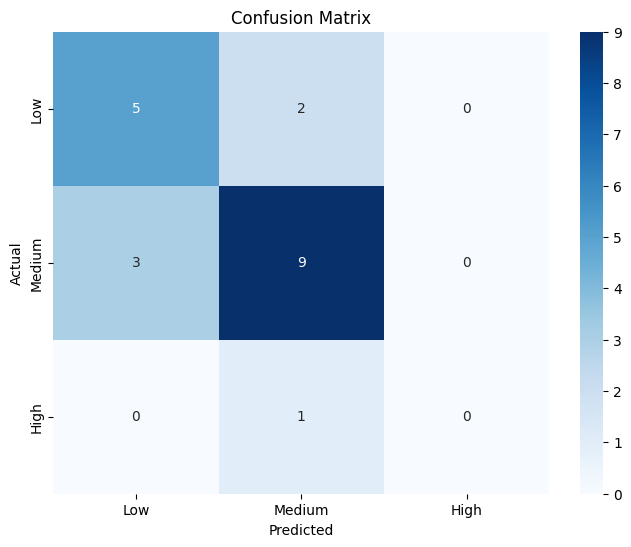

In [65]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
categories = ['Low', 'Medium', 'High']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()